<h1 align="center">Regression Model for Predicting Wine Quality</h1>

## Introduction

This notebook aims to accomplish [Regression Model](https://algorit.ma/course/regression-models/) course at Algoritma. The dataset used is obtained from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality), i.e. Wine Quality Data Set. The dataset will be used to predict wine quality.

### Dataset Background

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link](http://www.vinhoverde.pt/en/) or the reference [Cortez et al., 2009](http://dx.doi.org/10.1016/j.dss.2009.05.016). Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

### Aim

The goal is to model wine quality based on physicochemical tests.

### Objectives

a. To solve the final model equation

b. To output the statistical values (adjusted) R-squared and Root Mean Squared Error (RMSE)

c. To examine the model including statistics and visualizations:

- Assess linearity of model (parameters)
- Assess serial independence of errors
- Assess heteroscedasticity
- Assess normality of residual distribution
- Assess multicollinearity

d. To interpretate the model

e. To consider other factors, such as:

- Are there any outliers?
- Are there missing values?
- How will categorical variables be handled?

f. To test the model using dataset test and discuss the results


### Metadata

There are 12 columns available in the dataset. They are briefly described below or you can read in [this file](winequality.names). For more information, read [Cortez et al., 2009](http://dx.doi.org/10.1016/j.dss.2009.05.016).

Input variables (based on physicochemical tests):

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):

12. quality (score between 0 and 10)

### Source

Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal @2009

### Relevant Papers

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Available at: [Web Link](http://dx.doi.org/10.1016/j.dss.2009.05.016)

## Preparation

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.stats.stats import pearsonr
import statsmodels.api as sm

In [39]:
redDF = pd.read_csv('winequality-red.csv', delimiter=";")
whiteDF = pd.read_csv('winequality-white.csv', delimiter=";")

In [41]:
redDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [42]:
whiteDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [45]:
redDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [46]:
whiteDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


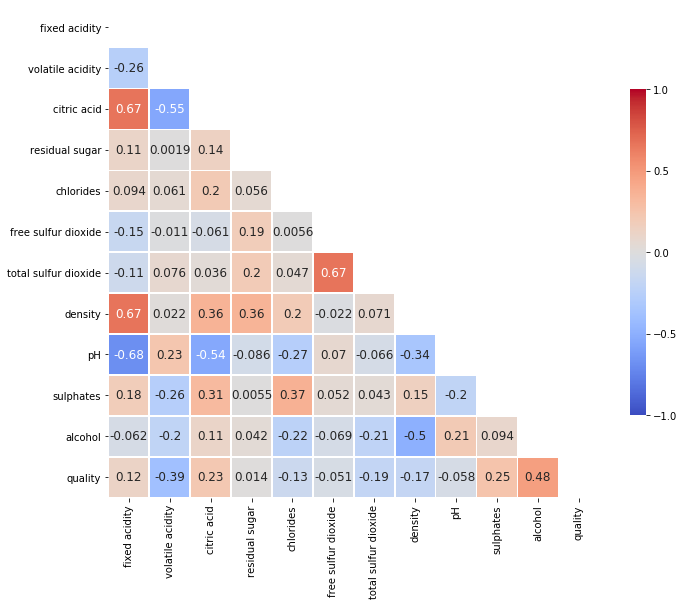

In [55]:
df_corr = redDF.corr()

# df_dummy = pd.get_dummies(redDF.htype)
# df = pd.concat([redDF, df_dummy], axis = 1)

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(df_corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = "coolwarm",
                      cbar_kws = {'shrink': .4,
                                "ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#add the column names as labels
ax.set_yticklabels(df_corr.columns, rotation = 0)
ax.set_xticklabels(df_corr.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

`volatile acidity`, `alcohol`

In [70]:
corrtest = list(pearsonr(redDF.quality, redDF['volatile acidity']))
f'{corrtest[1]:.60f}'

'0.000000000000000000000000000000000000000000000000000000000021'

In [112]:
X = redDF.iloc[:,:-1]
y = redDF.quality

In [120]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [123]:
X_train = np.array(X_train)
X_train

array([[ 9.9 ,  0.54,  0.45, ...,  3.39,  0.62,  9.4 ],
       [10.8 ,  0.26,  0.45, ...,  3.13,  0.54,  9.6 ],
       [ 9.9 ,  0.35,  0.55, ...,  3.26,  0.79, 10.6 ],
       ...,
       [ 7.9 ,  0.57,  0.31, ...,  3.29,  0.69,  9.5 ],
       [13.  ,  0.47,  0.49, ...,  3.3 ,  0.68, 12.7 ],
       [ 9.8 ,  0.98,  0.32, ...,  3.25,  0.48,  9.4 ]])

In [124]:
y_test = np.array(y_test)

In [126]:
model = LinearRegression().fit(X_train, y_train)

In [127]:
model.score(X_train, y_train)

0.3654519616206867

In [128]:
model._residues

544.6089160231925

In [131]:
X_train1 = sm.add_constant(X_train)
X_train1

array([[ 1.  ,  9.9 ,  0.54, ...,  3.39,  0.62,  9.4 ],
       [ 1.  , 10.8 ,  0.26, ...,  3.13,  0.54,  9.6 ],
       [ 1.  ,  9.9 ,  0.35, ...,  3.26,  0.79, 10.6 ],
       ...,
       [ 1.  ,  7.9 ,  0.57, ...,  3.29,  0.69,  9.5 ],
       [ 1.  , 13.  ,  0.47, ...,  3.3 ,  0.68, 12.7 ],
       [ 1.  ,  9.8 ,  0.98, ...,  3.25,  0.48,  9.4 ]])

In [132]:
model1 = sm.OLS(y_train, X_train1)

In [133]:
results = model1.fit()

In [135]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     66.34
Date:                Fri, 14 Feb 2020   Prob (F-statistic):          6.26e-117
Time:                        23:00:56   Log-Likelihood:                -1268.8
No. Observations:                1279   AIC:                             2562.
Df Residuals:                    1267   BIC:                             2624.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.9987     23.831      1.469      0.142     -11.755      81.752
x1             0.0413      0.029      1.416      0.157      -0.016       0.098
x2            -1.1495      0.133     -8.631      0.000      -1.411      -0.888
x3            -0.1779      0.165     -1.077      0.282      -0.502       0.146
x4             0.0279      0.017      1.670      0.095      -0.005       0.061
x5            -1.8734      0.466     -4.024      0.000      -2.787      -0.960
x6             0.0027      0.002      1.097      0.273      -0.002       0.007
x7            -0.0028      0.001     -3.448      0.001      -0.004      -0.001
x8           -31.5167     24.325     -1.296      0.195     -79.238      16.205
x9            -0.2545      0.216     -1.179      0.239      -0.678       0.169
x10            0.9240      0.126      7.362      0.000       0.678       1.170
x11            0.2678      0.030      9.031      0.000       0.210       0.326
==============================================================================
Omnibus:                       21.104   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.312
Skew:                          -0.182   Prob(JB):                     4.32e-07
Kurtosis:                       3.646   Cond. No.                     1.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""